In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

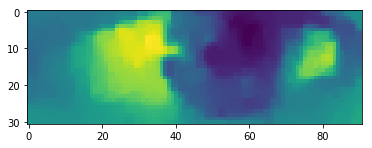

In [85]:
image = mpimg.imread('.\\data\\leftEye412.jpg ')
cv2.normalize(image, image, 0, 255, cv2.NORM_MINMAX)
Bimage = cv2.edgePreservingFilter(image,flags=1, sigma_s=10, sigma_r=0.35)
image = cv2.cvtColor(Bimage, cv2.COLOR_RGB2GRAY)
imgplot = plt.imshow(image)

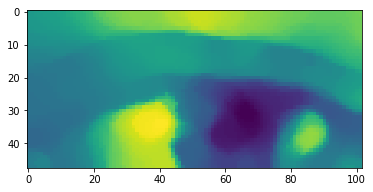

In [82]:
import  cv2
Mimage = cv2.medianBlur(image, 7)
imgplot = plt.imshow(Mimage)

(18, 3)
74	16	22
51	36	31
49	34	28
56	19	25
51	21	22
54	39	34
59	16	31
61	21	22
46	31	22
86	14	22
46	24	22
64	16	28
49	29	22
41	24	25
31	21	34
84	6	22
54	11	31
54	26	22


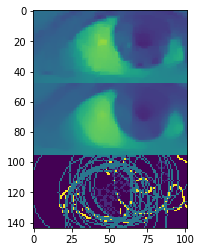

In [80]:
canny_thr = 60
c_g_neg_img = cv2.Canny(Mimage, 3, canny_thr, canny_thr//2, 3 )

imgplot = plt.imshow(c_g_neg_img)
circles = cv2.HoughCircles(Mimage, cv2.HOUGH_GRADIENT, 2.5, 1, param1 =canny_thr, param2 = 25, minRadius = 20, maxRadius = 35)
print((circles[0,:].shape))

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(c_g_neg_img,(i[0],i[1]),i[2],(100,100,70),0)
    # draw the center of the circle
    cv2.circle(c_g_neg_img,(i[0],i[1]),3,(30,30,30),1)
    print('{}\t{}\t{}'.format(i[0],i[1],i[2]))
stack = np.vstack([image, Mimage, c_g_neg_img])
resized = [1*x for x in stack.shape]
scaled_image = cv2.resize(stack, tuple(resized[::-1]))
imgplot = plt.imshow(scaled_image, interpolation='nearest', aspect='equal')

In [67]:
Gimage = cv2.GaussianBlur(image, (5,5), 2, 0)
Center_min =np.argwhere(Gimage == np.min(Gimage))
#print(Center_min)

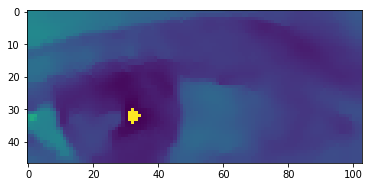

In [59]:
a_c = np.mean(Center_min, axis=0)
for c in Center_min:
    cv2.circle(image,(c[1],c[0]),0,(255,255,0),2)
    pass
cv2.circle(image,(int(a_c[1]),int(a_c[0])),0,(255,0,100),2)
implot = plt.imshow(image)   

In [479]:
a_c

array([19., 45.])